# **Árbol de Decisión**

```
Alumno : Pfoccori Quispe Alex Harvey
Codigo: 193837
Proposito : Árbol de Decisión en la clasificación de calidad de vino
```

## **Árbol de Decisión**
Prueba de un árbol de decisión con el dataset de microorganismos.</br>
El criterio para la constrcción del árbol es el de gini con una profundidad considerable.</br>
Se incluye la etapa de test y predicción, así como el cálculo de las métricas respectivas.

## **1. Librerias a utilizar**

In [1]:
# Librerias generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

# Librerias para metricas
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Librerias para Naive Bayes
from sklearn.tree import DecisionTreeClassifier

## **2. Leer datos**

In [2]:
datos = pd.read_csv('winequality.csv', sep=',')
datos.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,12.2,0.450,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5
1,12.2,0.450,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5
2,8.6,0.315,0.40,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,6
3,9.8,0.340,0.39,1.4,0.066,3.0,7.0,0.99470,3.19,0.55,11.4,7
4,8.0,0.600,0.08,2.6,0.056,3.0,7.0,0.99286,3.22,0.37,13.0,5
5,8.0,0.580,0.16,2.0,0.120,3.0,7.0,0.99454,3.22,0.58,11.2,6
6,6.9,0.390,0.24,2.1,0.102,4.0,7.0,0.99462,3.44,0.58,11.4,4
7,11.6,0.230,0.57,1.8,0.074,3.0,8.0,0.99810,3.14,0.70,9.9,6
8,9.9,0.320,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4,6
9,10.3,0.270,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.8,6


## **3. Descripcion de datos**

In [3]:
# Estadisticos basicos por atributos
print(datos.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1593.000000       1593.000000  1593.000000     1593.000000   
mean        8.319523          0.527476     0.271161        2.538010   
std         1.738144          0.179059     0.194954        1.409835   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1593.000000          1593.000000           1593.000000  1593.000000   
mean      0.087501            15.875706             46.391714     2.213269   
std       0.047140            10.466847             32.885012     9.681967   
min       0.012000             1.000000         

## **4. Histograma**

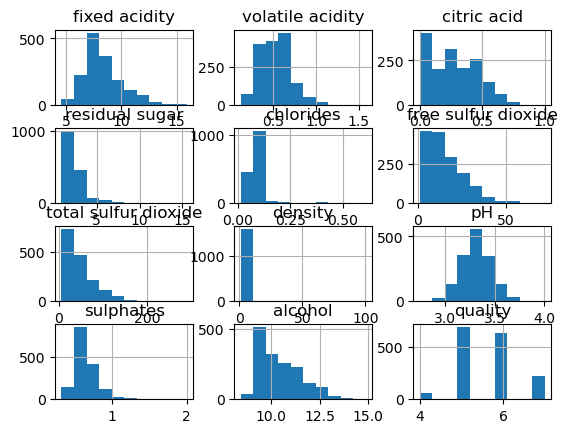

In [4]:
datos.hist()
plt.show()

## **5. Distribucion de clases**

In [5]:
# Numero de registros por especie de iris
print(datos.groupby('quality').size())

quality
4     63
5    681
6    633
7    216
dtype: int64


## **5. Separación de datos, para entrenamiento y test**

In [29]:
x = datos.drop(['quality'], axis = 1)
y = datos['quality']

# Separa datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=5, train_size=0.8)

## **6. Entrenamiento de árbol de decisión**

In [32]:
# Crear el obj árbol de decisión
# HIPERPARAMETRO
#=========
# Indice de impuresa GINI: (criterion)
# Máxima profundidad del árbol: (max_depth)
ArbolDecision = DecisionTreeClassifier(criterion='gini', max_depth=100)

# entrenar el árbol de decision
ArbolDecision.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=100)

## **Test AD**

In [33]:
ArbolDecision.score(x_test, y_test)

0.6050156739811913

## **7. Gráfica de árbol de decisión**

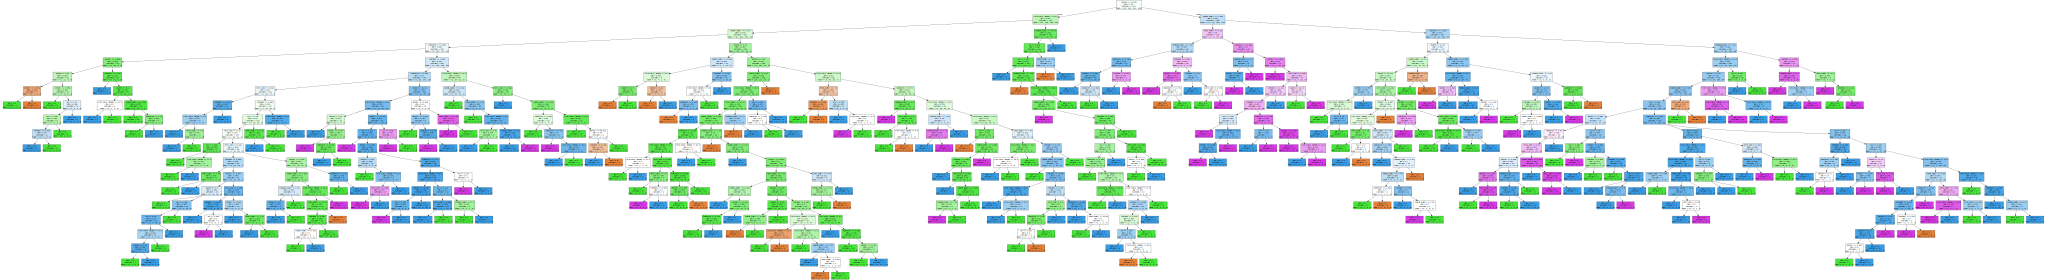

In [34]:
from sklearn.tree import export_graphviz
from graphviz import Source # conda install -c conda-forge python-graphviz
from IPython.display import SVG

graph = Source(export_graphviz(ArbolDecision, feature_names=x.columns, filled=True))
SVG(graph.pipe(format='svg'))

## **8. Test**

In [35]:
pred = ArbolDecision.predict(x_test)
print(pred)
print(y_test)

[6 5 5 6 6 5 7 6 6 4 6 5 6 5 5 5 5 6 7 4 4 5 6 5 6 5 6 7 6 5 7 5 7 6 5 6 5
 5 5 7 6 6 6 5 6 5 6 5 6 6 6 5 6 6 5 5 5 5 6 5 5 5 5 6 5 6 7 5 7 6 4 5 6 6
 4 5 6 6 5 5 6 5 6 5 6 6 7 6 4 6 6 6 5 5 6 5 6 5 5 5 7 6 5 7 5 5 5 5 5 6 5
 6 6 5 6 7 4 5 6 7 5 5 7 6 6 4 5 6 5 5 6 5 6 5 5 6 5 5 6 4 5 6 5 7 5 6 5 5
 6 6 5 6 5 6 7 5 7 5 6 6 4 5 5 5 5 6 5 6 5 5 6 5 5 6 5 7 5 6 5 5 5 6 5 4 5
 5 5 5 5 5 5 4 6 5 7 5 4 6 5 6 7 5 5 6 6 5 7 5 6 5 5 5 6 6 6 6 6 5 6 6 6 6
 4 6 5 7 5 5 6 6 5 6 5 5 6 5 6 7 5 5 5 5 6 5 6 6 5 5 5 5 6 6 5 5 6 7 5 6 6
 6 5 5 7 6 6 6 6 6 5 5 6 6 5 6 6 6 5 7 5 5 5 5 6 7 5 6 7 6 5 6 5 6 5 6 5 6
 5 6 5 7 5 5 6 5 6 5 5 6 5 5 7 6 6 6 6 5 6 6 5]
599     6
787     5
47      7
1237    4
1069    6
       ..
421     5
742     5
187     5
1467    5
3       7
Name: quality, Length: 319, dtype: int64


## **9. Matriz de confusión y métricas**

In [36]:
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)

print('Matriz de Confusión')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusión
[[ 2  4  2  1]
 [ 8 98 32  3]
 [ 4 33 76  9]
 [ 0 14 16 17]]
Exactitud =  0.6050156739811913


## **10. Prediccion**

In [38]:
nuevo = np.array([[9.8, 0.46, 0.48, 1.4, 0.075, 3.0, 6.0, 0.99, 3.13, 0.63, 10.4]])

pred = ArbolDecision.predict(nuevo)
print(pred)

[5]


c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
